In [1]:
# Load libraries

import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get working directory
print(os.getcwd())

# Set working directory

os.chdir('C:/Users/ravigv/Documents/ROOCA_Causecode/DA') 
print(os.getcwd())

C:\Users\ravigv
C:\Users\ravigv\Documents\ROOCA_Causecode\DA


In [3]:
df = pd.read_csv('wb_causecode_data1.csv')
print('Training data shape: ', df.shape)
df.head()

Training data shape:  (66840, 10)


,causecode_id,DESCRIPTION,CAUSE_DESC_LEVL2,CAUSE_DESC_LEVL3,tower,cc,cluster,impact,Operational_Categorization_Tier_1,technology
0,946,Access,Approval,Access/SAP Issue/Unable to access environment,IMD,IMD,SAP BI,4 - Individual,Investigate > Performance,SAP
1,549,Request,Enquiry,Information,IMD,IMD,SAP BI,4 - Individual,Inquiry > On Process,SAP
2,910,Access,Request,Unlock,IMD,IMD,SAP BI,4 - Individual,Inquiry,SAP
3,77,Access,Issue,Unable to access environment,IMD,IMD,SAP BI,4 - Individual,Add > Access,SAP
4,77,Access,Issue,Unable to access environment,IMD,IMD,SAP BI,4 - Individual,Inquiry > How Do I?,SAP


In [ ]:
# Get column names
# print(list(df.columns))


# print(df.info())

In [4]:
# # Create target variable a combination of cause codes
df['combined']= df['DESCRIPTION'].astype(str) + ' '+df['CAUSE_DESC_LEVL2'].astype(str) + ' ' + df['CAUSE_DESC_LEVL3'].astype(str)

In [5]:
# Function to examine Missing Values

# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [6]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 11 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Operational_Categorization_Tier_1,3831,5.7
tower,753,1.1
cc,753,1.1
cluster,753,1.1


In [7]:
# Drop missing values
df1 = df.dropna() 

In [8]:
# Missing values statistics
missing_values = missing_values_table(df1)
missing_values.head(20)

Your selected dataframe has 11 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
# Number of each type of column
# df1.dtypes.value_counts()

In [9]:
# Number of unique classes in each object column
df1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

DESCRIPTION                           50
CAUSE_DESC_LEVL2                     175
CAUSE_DESC_LEVL3                     560
tower                                  3
cc                                    10
cluster                               31
impact                                 7
Operational_Categorization_Tier_1    124
technology                            10
combined                             666
dtype: int64

In [10]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df1:
    if df1[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df1[col].unique())) <= 40:
            # Train on the training data
            le.fit(df1[col])
            # Transform both training and testing data
            df1[col] = le.transform(df1[col])
            #df1[col] = le.transform(df1[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

5 columns were label encoded.


In [11]:
#Label encoding for target variable - combined cause code
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Encode labels
df1['combined']= le.fit_transform(df1['combined'])

df1

,causecode_id,DESCRIPTION,CAUSE_DESC_LEVL2,CAUSE_DESC_LEVL3,tower,cc,cluster,impact,Operational_Categorization_Tier_1,technology,combined
0,946,Access,Approval,Access/SAP Issue/Unable to access environment,0,4,25,5,Investigate > Performance,7,0
1,549,Request,Enquiry,Information,0,4,25,5,Inquiry > On Process,7,580
2,910,Access,Request,Unlock,0,4,25,5,Inquiry,7,26
3,77,Access,Issue,Unable to access environment,0,4,25,5,Add > Access,7,6
4,77,Access,Issue,Unable to access environment,0,4,25,5,Inquiry > How Do I?,7,6
...,...,...,...,...,...,...,...,...,...,...,...
66835,575,Application,Deal,Inclusion list,2,0,6,4,Failure,7,136
66836,686,Application,Deal,Deal Lock,2,0,6,6,Inquiry / Help,7,123
66837,899,Application,Deal,Check out boxes issue,2,0,6,6,Inquiry / Help,7,118
66838,848,Application,Change Order,Date Issue,2,0,6,4,Failure,7,58


In [12]:
# one-hot encoding of categorical variables
df2 = pd.get_dummies(df1)


print('Features shape: ', df2.shape)

df2.head()

Features shape:  (62256, 916)


,causecode_id,tower,cc,cluster,impact,technology,combined,DESCRIPTION_Access,DESCRIPTION_Application,DESCRIPTION_Approval,...,Operational_Categorization_Tier_1_Run > Batch,Operational_Categorization_Tier_1_Run > Extract,Operational_Categorization_Tier_1_Run > ITSR Request,Operational_Categorization_Tier_1_Run > Job,Operational_Categorization_Tier_1_Run > Report,Operational_Categorization_Tier_1_Train > ITSR Request,Operational_Categorization_Tier_1_Train > ITSR Request > ITSR-Server/Service Request,Operational_Categorization_Tier_1_Uninstall > Server,Operational_Categorization_Tier_1_Uninstall > Server > Password,Operational_Categorization_Tier_1_Uninstall > Termination
0,946,0,4,25,5,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,549,0,4,25,5,7,580,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,910,0,4,25,5,7,26,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,77,0,4,25,5,7,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,77,0,4,25,5,7,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Rearranging combined column to end of df 

dfpop = df2.pop('combined') # remove column b and store it in df1

df2['combined']= dfpop # add b series as a 'new' column.

df2.head()

,causecode_id,tower,cc,cluster,impact,technology,DESCRIPTION_Access,DESCRIPTION_Application,DESCRIPTION_Approval,DESCRIPTION_Archival,...,Operational_Categorization_Tier_1_Run > Extract,Operational_Categorization_Tier_1_Run > ITSR Request,Operational_Categorization_Tier_1_Run > Job,Operational_Categorization_Tier_1_Run > Report,Operational_Categorization_Tier_1_Train > ITSR Request,Operational_Categorization_Tier_1_Train > ITSR Request > ITSR-Server/Service Request,Operational_Categorization_Tier_1_Uninstall > Server,Operational_Categorization_Tier_1_Uninstall > Server > Password,Operational_Categorization_Tier_1_Uninstall > Termination,combined
0,946,0,4,25,5,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,549,0,4,25,5,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,580
2,910,0,4,25,5,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,26
3,77,0,4,25,5,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,77,0,4,25,5,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [14]:
X = df2.iloc[:,0:915]  #independent columns
y = df2.iloc[:,-1]    #target column i.e combined cause code

In [15]:
# print(y)

# print(X)

In [16]:
# Find correlations with the target and sort

correlations = df2.corr()['combined'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 CAUSE_DESC_LEVL3_Records missing in table                     0.131537
Operational_Categorization_Tier_1_Investigate > Data Query    0.135526
CAUSE_DESC_LEVL3_Report Run                                   0.151158
Operational_Categorization_Tier_1_Inquiry                     0.173336
CAUSE_DESC_LEVL2_Mismatch                                     0.214983
CAUSE_DESC_LEVL3_Data Update Request                          0.214997
DESCRIPTION_Report                                            0.216716
CAUSE_DESC_LEVL3_Information                                  0.310851
CAUSE_DESC_LEVL2_Enquiry                                      0.332867
CAUSE_DESC_LEVL3_General Service request                      0.344762
DESCRIPTION_General                                           0.348392
DESCRIPTION_Request                                           0.352599
cc                                                            0.460292
DESCRIPTION_Data                                

In [17]:
# Create correlated matrix and drop columns highly correlated

# Create correlation matrix
corr_matrix = df2.corr().abs()


# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df2.drop(to_drop, axis=1, inplace=True)

In [18]:
df2

,causecode_id,tower,cc,cluster,impact,technology,DESCRIPTION_Access,DESCRIPTION_Application,DESCRIPTION_Approval,DESCRIPTION_Archival,...,Operational_Categorization_Tier_1_Run > Extract,Operational_Categorization_Tier_1_Run > ITSR Request,Operational_Categorization_Tier_1_Run > Job,Operational_Categorization_Tier_1_Run > Report,Operational_Categorization_Tier_1_Train > ITSR Request,Operational_Categorization_Tier_1_Train > ITSR Request > ITSR-Server/Service Request,Operational_Categorization_Tier_1_Uninstall > Server,Operational_Categorization_Tier_1_Uninstall > Server > Password,Operational_Categorization_Tier_1_Uninstall > Termination,combined
0,946,0,4,25,5,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,549,0,4,25,5,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,580
2,910,0,4,25,5,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,26
3,77,0,4,25,5,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,77,0,4,25,5,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66835,575,2,0,6,4,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,136
66836,686,2,0,6,6,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,123
66837,899,2,0,6,6,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,118
66838,848,2,0,6,4,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,58


In [20]:
#apply SelectKBest class to extract top 10 best features - Chi square for feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [21]:
# Get scores and column names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [22]:
#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [23]:
# Get 10 best features

# featureScores.sort_values(by=['Score'], ascending=False)

print(featureScores.nlargest(10,'Score'))  #print 10 best features


                                         Features         Score
0                                    causecode_id  1.057229e+07
3                                         cluster  1.369114e+05
2                                              cc  8.410406e+04
69                         CAUSE_DESC_LEVL2_CHARM  6.225500e+04
272                  CAUSE_DESC_LEVL3_Avails List  6.225500e+04
302  CAUSE_DESC_LEVL3_CUI - Eapproval Portal Role  6.225500e+04
386                CAUSE_DESC_LEVL3_Email address  6.225500e+04
390              CAUSE_DESC_LEVL3_End Notes Issue  6.225500e+04
394     CAUSE_DESC_LEVL3_Enterprise Scan profiles  6.225500e+04
489                     CAUSE_DESC_LEVL3_LF Issue  6.225500e+04


In [24]:
# Select Features With Best ANOVA F-Values

from sklearn.feature_selection import f_classif

# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=10)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

In [25]:
# Get scores and column names
df1scores = pd.DataFrame(fvalue_selector.scores_)
df1columns = pd.DataFrame(X.columns)

In [26]:
#concat two dataframes for better visualization 

fScores = pd.concat([df1columns,df1scores],axis=1)
fScores.columns = ['Specs','Score']  #naming the dataframe columns

fScores

,Specs,Score
0,causecode_id,inf
1,tower,32.884612
2,cc,101.907836
3,cluster,131.679291
4,impact,3.586423
...,...,...
910,Operational_Categorization_Tier_1_Train > ITSR...,1.409949
911,Operational_Categorization_Tier_1_Train > ITSR...,0.016936
912,Operational_Categorization_Tier_1_Uninstall > ...,0.855674
913,Operational_Categorization_Tier_1_Uninstall > ...,0.354983


In [27]:
# Get 10 best features

# fScores.sort_values(by=['Score'], ascending=False)

print(fScores.nlargest(10,'Score'))  


                        Specs  Score
0                causecode_id    inf
6          DESCRIPTION_Access    inf
7     DESCRIPTION_Application    inf
8        DESCRIPTION_Approval    inf
9        DESCRIPTION_Archival    inf
10   DESCRIPTION_Asset search    inf
11  DESCRIPTION_Authorization    inf
12         DESCRIPTION_Backup    inf
13      DESCRIPTION_Batch Job    inf
14       DESCRIPTION_Capacity    inf


In [28]:
# Feature selection by ExtraTreesClassifier -multiple de-correlated decision trees

from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [29]:
# use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 


[7.07453201e-02 6.52763600e-03 1.12479669e-02 1.10133226e-02
 1.05224302e-03 3.72316207e-03 2.41633479e-02 6.60652409e-03
 1.27949187e-03 9.85389636e-05 4.12303440e-06 1.47951011e-03
 4.70301391e-05 1.61391487e-03 1.41845520e-04 7.50162509e-04
 3.79901686e-04 1.60315158e-03 9.13454808e-06 1.97514455e-02
 2.76818005e-04 9.89380287e-05 5.00931159e-04 2.88330817e-02
 8.34453970e-05 4.92698339e-05 2.23370723e-04 6.13958235e-04
 1.52019708e-04 1.14612416e-03 3.08416228e-05 2.45062744e-04
 6.92442782e-04 3.14837195e-05 5.32464634e-06 5.37848328e-05
 1.53961030e-05 5.62993464e-04 4.70395836e-03 1.20191405e-02
 2.97372343e-04 1.21298473e-04 3.58904507e-04 7.75017502e-04
 4.15702786e-04 6.00969521e-04 4.39054189e-04 2.17755902e-05
 5.48849493e-05 9.04995925e-05 1.12344029e-04 5.73873872e-05
 3.35492034e-04 1.71812248e-05 4.90397175e-04 4.48891445e-05
 1.88027697e-04 4.09410747e-04 9.22665252e-05 6.82951976e-05
 4.70966026e-05 4.55640944e-04 1.39949272e-03 3.76325353e-04
 1.79501868e-04 4.216560

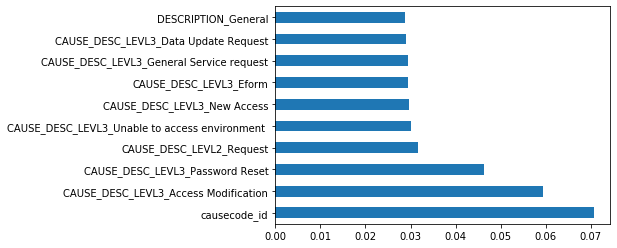

In [30]:
# Plotting top 10 feature importance by ExtraTreesClassifier
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Feature: 0, Score: 0.11564
Feature: 1, Score: 0.00569
Feature: 2, Score: 0.01456
Feature: 3, Score: 0.02110
Feature: 4, Score: 0.00171
Feature: 5, Score: 0.00570
Feature: 6, Score: 0.02169
Feature: 7, Score: 0.00533
Feature: 8, Score: 0.00103
Feature: 9, Score: 0.00009
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00125
Feature: 12, Score: 0.00005
Feature: 13, Score: 0.00167
Feature: 14, Score: 0.00013
Feature: 15, Score: 0.00100
Feature: 16, Score: 0.00034
Feature: 17, Score: 0.00165
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.01736
Feature: 20, Score: 0.00028
Feature: 21, Score: 0.00008
Feature: 22, Score: 0.00056
Feature: 23, Score: 0.03117
Feature: 24, Score: 0.00008
Feature: 25, Score: 0.00004
Feature: 26, Score: 0.00035
Feature: 27, Score: 0.00055
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00085
Feature: 30, Score: 0.00004
Feature: 31, Score: 0.00023
Feature: 32, Score: 0.00059
Feature: 33, Score: 0.00002
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00004
Fe

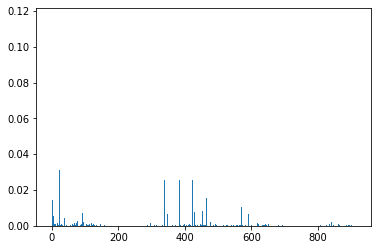

In [33]:
# Feature selection by Random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()


# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

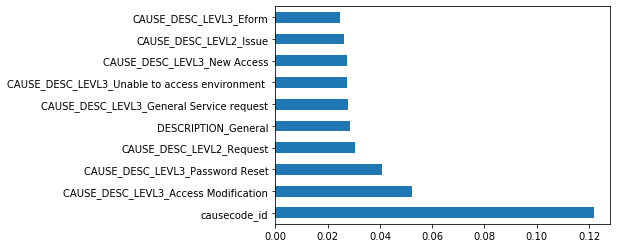

In [32]:
# Plotting top 10 feature importance by ExtraTreesClassifier
fimp = pd.Series(importance, index=X.columns)
fimp.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# xgboost for feature importance on a classification problem
from xgboost import XGBClassifier

model = XGBClassifier()

# fit the model
model.fit(X, y)

# get importance
importance1 = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance1):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance1))], importance1)
plt.show()

In [ ]:
# Plotting top 10 feature importance by ExtraTreesClassifier
fimp = pd.Series(importance1, index=X.columns)
fimp.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# Permutation Feature Importance for Classification

# permutation feature importance with knn for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# define the model
model = KNeighborsClassifier()

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')

# get importance
importance2 = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance2):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
    
# plot feature importance
pyplot.bar([x for x in range(len(importance2))], importance2)
pyplot.show()

In [ ]:
# Plotting top 10 feature importance by ExtraTreesClassifier
fimp = pd.Series(importance2, index=X.columns)
fimp.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# plot feature importance using built-in function

from xgboost import XGBClassifier
from xgboost import plot_importance


# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [23]:
print(corr_matrix)

                                                    causecode_id     tower  \
causecode_id                                            1.000000  0.056290   
tower                                                   0.056290  1.000000   
cc                                                      0.065503  0.467114   
cluster                                                 0.215845  0.112424   
impact                                                  0.017842  0.028703   
...                                                          ...       ...   
Operational_Categorization_Tier_1_Train > ITSR ...      0.003800  0.002060   
Operational_Categorization_Tier_1_Uninstall > S...      0.004253  0.006216   
Operational_Categorization_Tier_1_Uninstall > S...      0.011691  0.017847   
Operational_Categorization_Tier_1_Uninstall > T...      0.003800  0.004830   
combined                                                0.074866  0.182720   

                                                          cc   

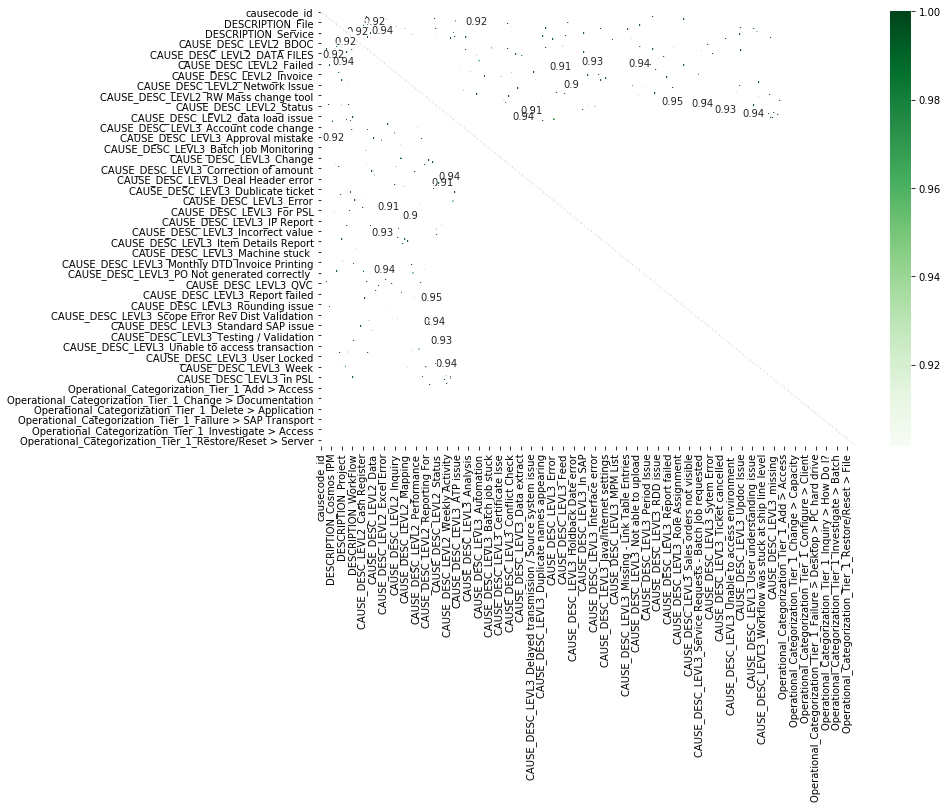

In [22]:
kot = corr_matrix[corr_matrix >=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, annot=True, cmap="Greens")

In [24]:
# top_corr_features = corr_matrix.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# # Get count of each category in column
# for c in df1.columns: 
#     display(df1[c].value_counts().to_frame())


In [ ]:
# df2 = df1.apply(lambda x: x.value_counts()).T.stack()
# df2.to_excel("C:/Users/ravigv/Documents/ROOCA_Causecode/DA/cclvl2/featureCount.xlsx")

In [ ]:
# df['combined']= df['DESCRIPTION'].astype(str) + ' '+df['CAUSE_DESC_LEVL2'].astype(str) + ' ' + df['CAUSE_DESC_LEVL3'].astype(str)

In [ ]:
# df[["DESCRIPTION", "C", ]].astype(str) 
# df1[combined].unique()

In [ ]:
# counts = df1['combined'].value_counts()
# counts

In [ ]:
# new_df = df.loc[df['combined'].isin(counts.index[counts > 1000])]
# new_df['combined'].value_counts()

In [ ]:
# new_df.shape

In [ ]:
# train, test = train_test_split(new_df, test_size=0.2, random_state=42, 
#                                stratify=new_df[['combined']])

In [ ]:
# train.to_excel("C:/Users/ravigv/Documents/ROOCA_Causecode/DA/feattrain_V1.xlsx")
# test.to_excel("C:/Users/ravigv/Documents/ROOCA_Causecode/DA/featest_V1.xlsx")

In [ ]:
# print(len(train.CAUSE_DESC_LEVL3.values))  
# print(len(set(train.CAUSE_DESC_LEVL3.values)))  
# print(train.shape, test.shape)

In [ ]:
# # Load data

# data = pd.read_excel('featest_V1.xlsx')
# data.dropna()  

# X =  data.drop('combined', axis=1)
# y = data[['combined']]

In [ ]:
# # Train A Decision Tree Model

# # Create decision tree classifer object
# clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# # Train model
# model = clf.fit(X, y)

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# # prepare input data
# def prepare_inputs(X_train, X_test):
#     oe = OrdinalEncoder()
#     oe.fit(X_train)
#     X_train_enc = oe.transform(X_train)
#     X_test_enc = oe.transform(X_test)
#     return X_train_enc, X_test_enc

In [ ]:
# prepare_inputs(X, y)

In [ ]:
# len(list(df1['combined'].unique()))

# # len(df1['DESCRIPTION'].unique())